**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 

## 1. Genere una submuestra de casos

* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
* Seleccione el 50% de los casos.
* Cada base generada debe contener los siguientes elementos:
  * El índice de desarrollo humano ( _undp_hdi_ )
  * El nombre del país ( _ccodealp_ )
  * La región a la que pertenece ( _ht_region_ )
  * El PIB per capita. ( _gle_cgdpc_ )
  * El total de la población ( _imf_pop_ )
  
* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
   * _wef_imort_ : Infant mortality, deaths/1000 live births
   * _who_alc2000_ : Alcohol consumption per capita (2000-)
   * _who_tobt_ : Current smoking of any tobacco product (Total).
   * _wdi_exph_ : Government expenditure on health, total (% of GDP)
   * Guarde esta tabla procesada en un nuevo objeto
   * Renombre las categorías de la variable ht_region de números a regiones  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1234)

df = pd.read_csv('qog_std_cs_jan18.csv')

subset = df.sample(frac = 0.5) 

subset_group = subset.loc[:, ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']] 

subset_group['region_recod'] = subset_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])


subset_group.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod
101,0.896,LUX,5,61404.4800,0.550,1.700000,11.12,24.400000,6.937873,WesternDem
51,0.739,ECU,2,7259.5200,15.775,19.100000,3.82,9.000000,9.161088,LatAm
146,0.735,LCA,10,11095.8000,0.167,NaN,9.97,NaN,6.719041,Caribbean
153,0.781,SYC,4,9583.3203,0.090,11.200000,9.72,26.700001,3.369817,SubSaharian
106,0.438,MLI,4,1063.2600,14.854,79.599998,0.61,18.600000,6.862166,SubSaharian


## 2. Genere una función que ingrese su objeto y devuelva:

* Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos

In [2]:
def getdescribe(dataframe): 
    for key, value in dataframe.iteritems():
        if pd.api.types.is_numeric_dtype(value):
            print(key)
            print('____________________')
            print(value.describe())
            print('\n')
        else:
            print(key)
            print('____________________')
            print('Frecuencia')
            print(value.value_counts())
            print('\n')            

getdescribe(subset_group)

undp_hdi
____________________
count    94.000000
mean      0.700628
std       0.156066
min       0.347000
25%       0.567500
50%       0.734500
75%       0.818250
max       0.938000
Name: undp_hdi, dtype: float64


ccodealp
____________________
Frecuencia
AUT    1
HUN    1
URY    1
CHE    1
FJI    1
MHL    1
MLI    1
MNE    1
VUT    1
LBR    1
KGZ    1
TUN    1
KIR    1
PRY    1
BHR    1
MRT    1
SUR    1
GMB    1
TTO    1
ESP    1
UZB    1
AZE    1
BLR    1
MDG    1
PAN    1
SYR    1
BFA    1
NER    1
CUB    1
OMN    1
      ..
COG    1
NRU    1
GRC    1
UGA    1
LSO    1
QAT    1
PAK    1
NZL    1
VNM    1
MMR    1
TKM    1
ECU    1
CHL    1
LTU    1
SWE    1
ETH    1
WSM    1
CZE    1
ZAF    1
CRI    1
BGR    1
KNA    1
POL    1
PHL    1
ARG    1
NLD    1
TGO    1
KWT    1
CHN    1
COM    1
Name: ccodealp, Length: 97, dtype: int64


ht_region
____________________
count    97.000000
mean      4.422680
std       2.641161
min       1.000000
25%       2.000000
50%       4.000000
75%    

* Reporte las estadísticas descriptivas para _gle_cgdpc_ , _undp_hdi_ , _imf_pop_ .


In [3]:
lista_estadistica = ['gle_cgdpc' , 'undp_hdi' , 'imf_pop' ]
for i in range(len(lista_estadistica)):
    value = lista_estadistica[i]
    print(value)
    print('____________________')    
    print('media')
    print(round(subset_group[value].mean(),3))
    print('varianza')
    print(round(np.var(subset_group[value]), 3))
    print('desviación estándar')
    print(round(np.std(subset_group[value]),3))
    print('\n')  

gle_cgdpc
____________________
media
15676.866
varianza
438957765.36
desviación estándar
20951.319


undp_hdi
____________________
media
0.701
varianza
0.024
desviación estándar
0.155


imf_pop
____________________
media
26.257
varianza
2154.912
desviación estándar
46.421




* Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

## 3. Genere una función que liste las observaciones perdidas de una variable

* La función debe contener los siguientes argumentos:
  * _dataframe_ : La función debe ingresar un objeto DataFrame.
  * _var_ : Variable a inspeccionar.
  * print_list : Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.
  * La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
  * Cuando print_list = True , debe retornar la lista de casos.
  * Analice todas las variables y sus casos perdidos.
  * Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [4]:
def getna(dataframe,var,print_list = False):  
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (DataFrame): La función debe ingresar un objeto DataFrame
    var (str): Variable a inspeccionar
    print_list (bool): Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.

    Returns:
    cantidad_perdidos: Retorna la cantidad de casos perdidos
    porcentaje_perdidos: Retorna el porcentaje correspondiente de casos perdidos
    lista : Lista de observaciones perdidas (en caso de print_list == True)

   """    
    temp = dataframe
    temp['flagnull'] = temp[var].isnull()
    total_elementos = len(temp)
    cantidad_perdidos = total_elementos - temp['flagnull'].value_counts().loc[False]
    porcentaje_perdidos = cantidad_perdidos/total_elementos
    del temp['flagnull']

    if print_list:
       lista = temp.loc[temp[var].isnull()]['ccodealp'].unique()
       return cantidad_perdidos, porcentaje_perdidos, lista
    else:
       return cantidad_perdidos, porcentaje_perdidos
    
lista = []
dic_perdidos = {}
# Registrando los nombres de columnas en una lista
for value in subset_group:
    lista.append(value)

# Analizando todas las variables con sus casos perdidos    
for value in range(len(lista)):
    codigo_columna = lista[value]
    c_perdidos, p_perdidods = getna(subset_group,codigo_columna)
    dic_perdidos[codigo_columna] = c_perdidos
    print(lista[value])
    print('____________________')
    print('Cantidad de perdidos {}'.format(c_perdidos))
    print('Porcentaje de perdidos: {}'.format(round(p_perdidods,2)))   
    print('\n')    
    

# Obteniendo los países perdidos para aquellas tres variables con mayor porcentaje de datos    
dic_perdidos = {k: v for k, v in sorted(dic_perdidos.items(), key=lambda x: x[1], reverse=True)}

contador = 0
for key in dic_perdidos:
    if (contador < 3):
        codigo_columna = key
        c_perdidos, p_perdidods, lista_perdidos = getna(subset_group,codigo_columna, True)
        print('Lista de países con datos perdidos para: {}'.format(key))
        print('{}'.format(lista_perdidos))   
        print('\n')
    contador += 1

undp_hdi
____________________
Cantidad de perdidos 3
Porcentaje de perdidos: 0.03


ccodealp
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


ht_region
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


gle_cgdpc
____________________
Cantidad de perdidos 1
Porcentaje de perdidos: 0.01


imf_pop
____________________
Cantidad de perdidos 24
Porcentaje de perdidos: 0.25


wef_imort
____________________
Cantidad de perdidos 26
Porcentaje de perdidos: 0.27


who_alc2000
____________________
Cantidad de perdidos 8
Porcentaje de perdidos: 0.08


who_tobt
____________________
Cantidad de perdidos 30
Porcentaje de perdidos: 0.31


wdi_exph
____________________
Cantidad de perdidos 1
Porcentaje de perdidos: 0.01


region_recod
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


Lista de países con datos perdidos para: who_tobt
['LCA' 'SYR' 'PLW' 'ATG' 'KWT' 'TKM' 'AUT' 'MCO' 'MNE' 'PER' 'LIE' 'BOL'
 'MDG' 'MHL' 'SUR' 'TGO' 'GM

## 4. Grafique los histogramas

Genere una función que grafique un histograma en conjunto y señale las medias.

La función debe incluír los siguientes argumentos:

* dataframe : La base de datos donde se encuentran los datos específicos.
* var : La variable a graficar.
* sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False .
* true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.

**Implemente las funciones para las 4 variables seleccionadas según su grupo.**



In [5]:
def gethistograma(dataframe,var,true_mean,sample_mean = False):  
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    var (str): La variable a graficar.
    sample_mean (bool): ooleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False
    true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa

    Returns:  Graficacion de Histograma
   """  
    
    dfhisto_dropna = dataframe[var].dropna()

    df_mean = np.mean(df[var].dropna())
    
    print('Media muestra completa {}'.format(df_mean))
    print('Media submuestra {}'.format(np.mean(dfhisto_dropna)))    

    subhisto_dropna = subset_group[var].dropna()
    subhisto_dropna_mean = subhisto_dropna.mean()     
    
    plt.hist(dfhisto_dropna, color='grey', alpha=.4)
    if (sample_mean):
        plt.axvline(np.mean(dfhisto_dropna), color = 'tomato', linestyle = '--')
    if (true_mean):    
        plt.axvline(np.mean(dataframe[var]), color = 'blue', linestyle = '--')
    plt.title("Variable {}".format(var))    


In [6]:
def gethistograma(dataframe, subdf, var,true_mean,sample_mean = False):  
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    subdf (Dataframe): La base de datos donde se encuentran los datos específicos.
    var (str): La variable a graficar.
    sample_mean (bool): ooleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False
    true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa

    Returns:  Graficacion de Histograma
   """  
    
    subdf_mean = np.mean(subdf[var].dropna())

    df_mean = np.mean(df[var].dropna())
    
    print('Media muestra completa {}'.format(df_mean))
    print('Media submuestra {}'.format(subdf_mean))    

    subhisto_dropna = subdf[var].dropna()
    
    plt.hist(subhisto_dropna, color='grey', alpha=.4)
    if (sample_mean):
        plt.axvline(subdf_mean, color = 'tomato', lw=3, linestyle = '--', label="Media Submuestra" )
    if (true_mean):    
        plt.axvline(df_mean, color = 'blue', lw=3, linestyle = '--', label="Media Muestra Completa")
    plt.title("Variable {}".format(var))    
    plt.legend(loc='upper right')
    if (subdf_mean > df_mean):
        print('Para el caso de {} la media de la submuestra es mayor a la muestra completa'.format(var))

Media muestra completa 24.086897087097167
Media submuestra 22.716901393003866


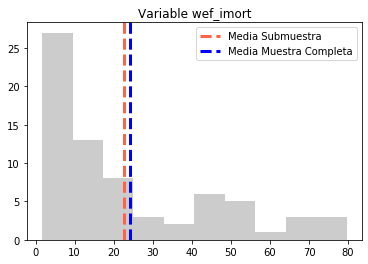

In [7]:
gethistograma(df, subset_group,'wef_imort',True,True)   

Media muestra completa 4.949340671727473
Media submuestra 5.341460709919102
Para el caso de who_alc2000 la media de la submuestra es mayor a la muestra completa


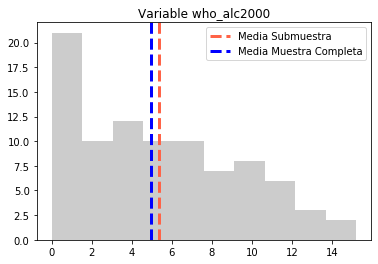

In [8]:
gethistograma(df, subset_group,'who_alc2000',True,True) 


Media muestra completa 23.285483875000008
Media submuestra 23.71044777164179
Para el caso de who_tobt la media de la submuestra es mayor a la muestra completa


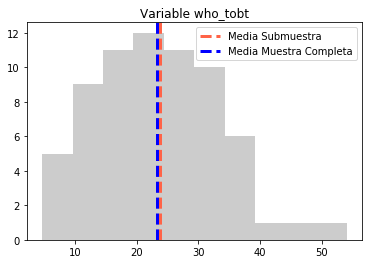

In [9]:
gethistograma(df, subset_group,'who_tobt',True,True)     


Media muestra completa 6.783758504767167
Media submuestra 6.564767864843209


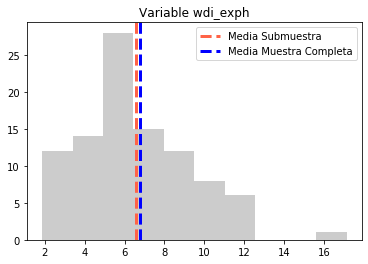

In [10]:
gethistograma(df, subset_group,'wdi_exph',True,True)     


¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

wef_imort
Media muestra completa 24.086897087097167
Media submuestra 22.716901393003866


who_tobt
Media muestra completa 23.285483875000008
Media submuestra 23.71044777164179
Para el caso de who_tobt la media de la submuestra es mayor a la muestra completa




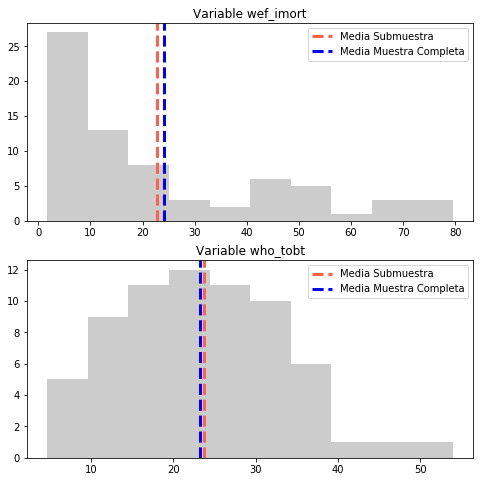

In [11]:
plt.figure(figsize=(8, 8))
print('wef_imort')
plt.subplot(2, 1, 1)
gethistograma(df, subset_group,'wef_imort',True,True) 
print('\n')
print('who_tobt')
plt.subplot(2, 1, 2)
gethistograma(df, subset_group,'who_tobt',True,True)     
print('\n')


## 5. Genere una función que devuelva un dotplot

La función debe contener los siguientes argumentos como argumentos:
* dataframe : La tabla de datos donde buscar las variables.
* plot_var : La variable a analizar y extraer las medias.
* plot_by : La variable agrupadora.
* global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False .
* statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean .

Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [12]:
def getdotplot(dataframe,plot_var,plot_by,global_stat = False, statistic = 'mean'):
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    plot_var (str): La variable a analizar y extraer las medias
    plot_by (str): La variable agrupadora
    global_stat: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False     
    statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean

    Returns:  Graficacion de Dotplot


   """      
    df_dropna = dataframe.dropna(subset=[plot_var]) 
    plt.title("Dotplot caso: {}".format(statistic))
    if (statistic == 'mean'):
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].mean(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].mean(), color = 'tomato', linestyle = '--', )
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')
    else:
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].median(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].median(), color = 'green', linestyle = '--')
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')        


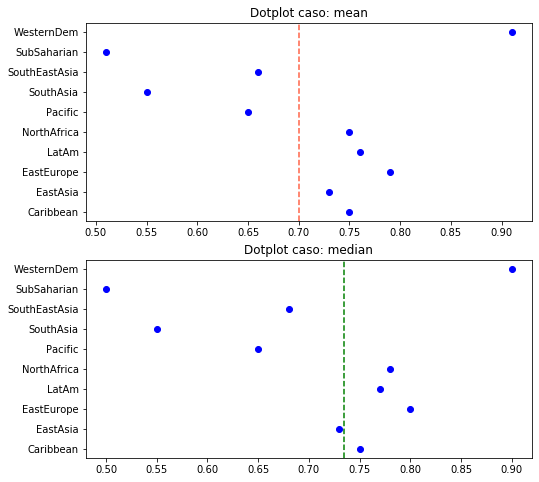

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)        
getdotplot(subset_group,'undp_hdi','region_recod',True,'mean')  
plt.subplot(2, 1, 2)
getdotplot(subset_group,'undp_hdi','region_recod',True,'median')   

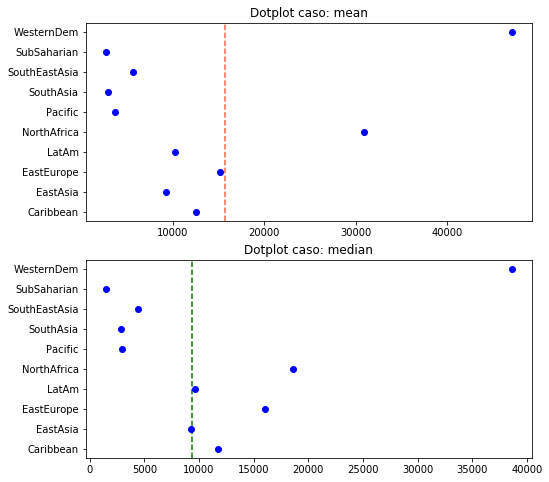

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)        
getdotplot(subset_group,'gle_cgdpc','region_recod',True,'mean')        
plt.subplot(2, 1, 2)        
getdotplot(subset_group,'gle_cgdpc','region_recod',True,'median') 

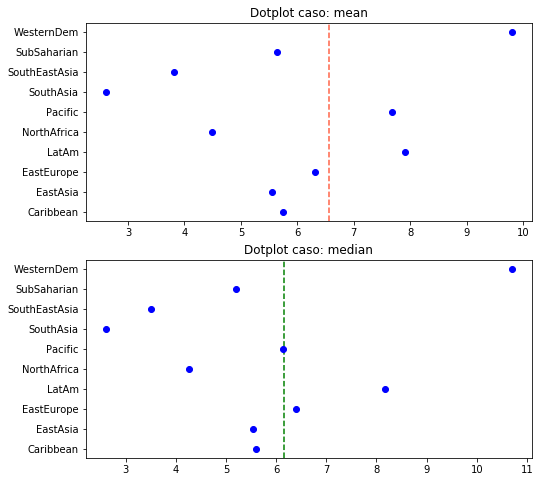

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)        
getdotplot(subset_group,'wdi_exph','region_recod',True,'mean')        
plt.subplot(2, 1, 2)        
getdotplot(subset_group,'wdi_exph','region_recod',True,'median') 

## 6. Guarde la base de datos
La submuestra creada tiene un método llamado to_csv .

Acceda a éste y guarde la base de datos con la siguiente nomenclatura:

subsample_iniciales.csv

In [16]:
subset_group.to_csv('subsample_comp.csv', encoding='utf-8', index=False)
